## Importing Libraries

In [ ]:
import nltk
import pandas as pd
import numpy as np
import tensorflow as tf
import string
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize

2025-07-01 21:19:58.327659: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-01 21:19:58.328980: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-01 21:19:58.356364: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-01 21:19:58.357398: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-01 21:19:58.806066: W tensorflow/compiler/tf2t

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/prod/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/prod/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Loading Dataset

In [3]:
data = pd.read_csv('IMDB Dataset.csv')
data.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [4]:
data.iloc[1,0]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [5]:
df = data.dropna()

In [6]:
data.shape

(50000, 2)

In [7]:
df.shape

(50000, 2)

In [8]:
df

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

## Text Preprocessing

In [9]:
punctuation = string.punctuation
stopwords = nltk.corpus.stopwords.words('english')
st = PorterStemmer()
lm = WordNetLemmatizer()

In [10]:
def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()
    text = "".join([char.lower() for char in text if char not in punctuation])
    tokens = word_tokenize(text)
    text = " ".join([lm.lemmatize(char) for char in tokens if char not in stopwords])
    return text

In [11]:
X = df['review'].apply(lambda x: clean_text(x))

In [12]:
Y = df = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [13]:
Y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

In [14]:
X[1]

'wonderful little production filming technique unassuming oldtimebbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwells mural decorating every surface terribly well done'

### Tokenizing Sentences

In [15]:
tokenized = [word_tokenize(sentence) for sentence in X.to_list()]
tokenized

[['one',
  'reviewer',
  'mentioned',
  'watching',
  '1',
  'oz',
  'episode',
  'youll',
  'hooked',
  'right',
  'exactly',
  'happened',
  'methe',
  'first',
  'thing',
  'struck',
  'oz',
  'brutality',
  'unflinching',
  'scene',
  'violence',
  'set',
  'right',
  'word',
  'go',
  'trust',
  'show',
  'faint',
  'hearted',
  'timid',
  'show',
  'pull',
  'punch',
  'regard',
  'drug',
  'sex',
  'violence',
  'hardcore',
  'classic',
  'use',
  'wordit',
  'called',
  'oz',
  'nickname',
  'given',
  'oswald',
  'maximum',
  'security',
  'state',
  'penitentary',
  'focus',
  'mainly',
  'emerald',
  'city',
  'experimental',
  'section',
  'prison',
  'cell',
  'glass',
  'front',
  'face',
  'inwards',
  'privacy',
  'high',
  'agenda',
  'em',
  'city',
  'home',
  'manyaryans',
  'muslim',
  'gangsta',
  'latino',
  'christian',
  'italian',
  'irish',
  'moreso',
  'scuffle',
  'death',
  'stare',
  'dodgy',
  'dealing',
  'shady',
  'agreement',
  'never',
  'far',
  '

### Train a CBOW Word2Vec using Gensim

In [45]:
from gensim.models import Word2Vec

# sg=0 - CBOW; vector_size is embedding dim
# sg=1 - Skipgram; vector_size is embedding dim
w2v_model = Word2Vec(
    sentences=tokenized,
    vector_size=200,
    window=5,
    min_count=2,
    sg=1,
    epochs=8
)


In [17]:
X = np.array(X.to_list())
Y = np.array(Y.to_list())

### Splitting Dataset into Training and Test set

In [18]:
#Splitting dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

## Text Vectorization

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,TextVectorization, Dropout, Bidirectional

In [46]:
vocab_size = 20000
max_len = 200
vectorize_layer = TextVectorization(
max_tokens=vocab_size,
 output_mode='int',
output_sequence_length=max_len
)

In [47]:
# build the vocabulary
vectorize_layer.adapt(X_train)

In [48]:
vocab = np.array(vectorize_layer.get_vocabulary())
#First 50 vocabulary
vocab[:50]

array(['', '[UNK]', 'movie', 'film', 'one', 'like', 'time', 'good',
       'character', 'get', 'even', 'story', 'would', 'make', 'see',
       'really', 'scene', 'much', 'well', 'people', 'great', 'bad',
       'also', 'show', 'first', 'way', 'dont', 'thing', 'made', 'think',
       'could', 'go', 'life', 'know', 'watch', 'many', 'love', 'actor',
       'seen', 'say', 'plot', 'two', 'never', 'look', 'little', 'acting',
       'end', 'best', 'year', 'ever'], dtype='<U20')

In [49]:
x1 = vectorize_layer(X_train)
x1

<tf.Tensor: shape=(37500, 200), dtype=int64, numpy=
array([[ 327,    2,  982, ...,    0,    0,    0],
       [2789, 1858,  545, ...,    0,    0,    0],
       [ 115,    2,  270, ...,    0,    0,    0],
       ...,
       [   1,  442, 7805, ...,    0,    0,    0],
       [ 437, 1008,   16, ...,    0,    0,    0],
       [ 188,  839,   17, ...,    0,    0,    0]])>

In [50]:
X_train.shape

(37500,)

In [51]:
vocab

array(['', '[UNK]', 'movie', ..., 'manisha', 'mamie', 'maléfique'],
      dtype='<U20')

## Building an Embedding aligned with TextVectorization vocab

In [52]:
w2v_model.vector_size

200

In [53]:
print(w2v_model.wv['good'])
print(w2v_model.wv['good'].shape)

[ 1.10852361e-01 -1.77616432e-01  2.42785230e-01  2.95424879e-01
 -5.30725531e-02 -1.54596433e-01  1.77895010e-03  2.90578783e-01
 -2.64589161e-01  2.14973137e-01  1.99800462e-01 -2.48591185e-01
 -1.33822560e-01 -2.58737244e-02 -5.41459210e-02  3.66633832e-02
 -1.08015098e-01 -3.65702987e-01  1.52898192e-01 -3.69071066e-01
 -2.63181552e-02 -1.51765019e-01  2.07282096e-01 -2.38550171e-01
  1.30671009e-01 -1.74195275e-01  1.82442158e-01 -2.62653641e-02
 -2.30132014e-01  9.78835225e-02 -6.35332465e-02  1.17399879e-01
  2.05549106e-01 -8.67267996e-02  2.43717924e-01  1.61521006e-02
  9.07859206e-02 -8.24732110e-02 -1.25404119e-01 -1.25863403e-01
 -4.60586138e-02 -1.09179385e-01  3.80058847e-02  7.57388622e-02
  2.35745370e-01 -2.07468063e-01 -1.88509554e-01  2.26513818e-02
  2.25113094e-01  6.81230053e-02  2.74869055e-01 -3.15511525e-02
 -3.41668017e-02 -5.69487810e-02  1.13098621e-01 -1.55978113e-01
  1.47299707e-01 -4.13947046e-01  1.72681034e-01 -1.02545682e-03
  6.82601705e-03  8.83037

### Step-1: Build an embedding matrix aligned with your TextVectorization vocab

In [ ]:
import numpy as np

vocab = vectorize_layer.get_vocabulary()
emb_dim = w2v_model.vector_size
embedding_matrix = np.zeros((len(vocab), emb_dim))

for i, word in enumerate(vocab):
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]


### Step-2: Initialize Keras Embedding with these weights

In [55]:
embedding_layer = Embedding(
    input_dim=len(vocab),
    output_dim=emb_dim,
    embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
    trainable=False    # or True, if you want to fine-tune
)


## Building Bidirectional LSTM Model

In [ ]:
model = Sequential()
# (1,) (because we need to guarantee that there is exactly one string
# input per batch), and the dtype needs to be 'string'.
model.add(tf.keras.Input(shape=(1,), dtype=tf.string))

model.add(vectorize_layer)
model.add(embedding_layer)
model.add(tf.keras.layers.SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(100, dropout = 0.3, recurrent_dropout = 0.3)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, 200)               0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 200, 200)          4000000   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 200, 200)          0         
 alDropout1D)                                                    
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               240800    
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                      

In [58]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),loss='binary_crossentropy',metrics=['accuracy'])

## Model Training

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),batch_size=32,epochs=20,
                    callbacks=[early_stop]
                    )

Epoch 1/20
1172/1172 [==============================] - 139s 116ms/step - loss: 0.5299 - accuracy: 0.7461 - val_loss: 0.9890 - val_accuracy: 0.5763
Epoch 2/20
1172/1172 [==============================] - 136s 116ms/step - loss: 0.4404 - accuracy: 0.8031 - val_loss: 0.3123 - val_accuracy: 0.8654
Epoch 3/20
1172/1172 [==============================] - 136s 116ms/step - loss: 0.3670 - accuracy: 0.8456 - val_loss: 0.3329 - val_accuracy: 0.8557
Epoch 4/20
1172/1172 [==============================] - 135s 116ms/step - loss: 0.3476 - accuracy: 0.8521 - val_loss: 0.2879 - val_accuracy: 0.8775
Epoch 5/20
1172/1172 [==============================] - 136s 116ms/step - loss: 0.3394 - accuracy: 0.8561 - val_loss: 0.2810 - val_accuracy: 0.8836
Epoch 6/20
1172/1172 [==============================] - 135s 116ms/step - loss: 0.3292 - accuracy: 0.8617 - val_loss: 0.2817 - val_accuracy: 0.8856
Epoch 7/20
1172/1172 [==============================] - 136s 116ms/step - loss: 0.3197 - accuracy: 0.8665 - val_

In [ ]:
##Model Saving
model.save("./Sentiment_Classifier_v2")

INFO:tensorflow:Assets written to: ./Sentiment_Classifier_3/assets


INFO:tensorflow:Assets written to: ./Sentiment_Classifier_3/assets


### Accuracy & Loss Visualization

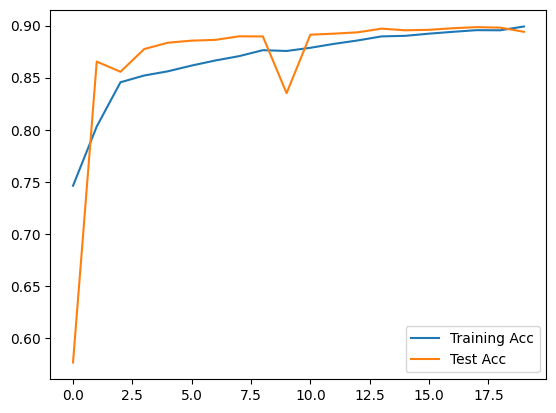

In [61]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='Training Acc')
plt.plot(history.history['val_accuracy'],label='Test Acc')
plt.legend()
plt.show()

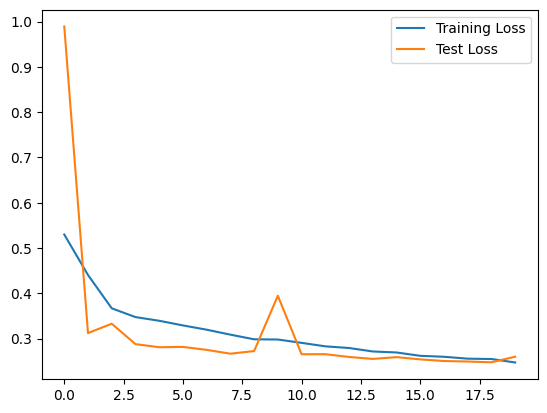

In [62]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Test Loss')
plt.legend()
plt.show()

### Model Testing - random text

In [83]:
Test_text = 'The movie was cool. The animation and the graphics were out of this world. I would recommend this movie.'
prediction = model.predict(np.array([clean_text(Test_text)]))
if(prediction[0]>0.5):
    print("Positive Sentiment", "\nScore:",prediction[0][0])
else:
    print("Negative Sentiment","\nScore:",prediction[0][0])

1/1 [==============================] - 0s 42ms/step
Positive Sentiment 
Score: 0.7529686


In [64]:
Test_text = 'The movie was good in first-half, but second half is worst, so i hate it'
prediction = model.predict(np.array([Test_text]))
if(prediction[0]>0.5):
    print("Positive Sentiment", "\nScore:",prediction[0][0])
else:
    print("Negative Sentiment","\nScore:",prediction[0][0])

1/1 [==============================] - 0s 38ms/step
Negative Sentiment 
Score: 0.008018432


In [82]:
Test_text = 'amzing movie.'

prediction = model.predict(np.array([clean_text(Test_text)]))
if(prediction[0]>0.5):
    print("Positive Sentiment", "\nScore:",prediction[0][0])
else:
    print("Negative Sentiment","\nScore:",prediction[0][0])

1/1 [==============================] - 0s 42ms/step
Positive Sentiment 
Score: 0.6079572


### Model Evaluation
- Precision
- Recall
- F1-score
- Confusion Matrix

In [66]:
y_pred = model.predict(X_test)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)
y_pred_binary

391/391 [==============================] - 12s 30ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [67]:
y_pred_binary.shape

(12500, 1)

In [68]:
y_true = np.array([Y_test]).T
y_true.shape

(12500, 1)

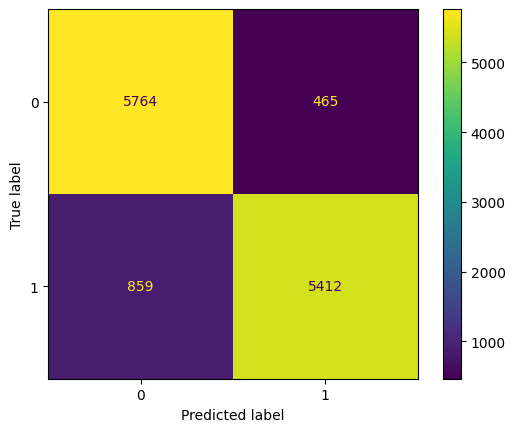

In [69]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(y_true,y_pred_binary))
disp.plot()

In [71]:
print(classification_report(y_true, y_pred_binary))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6229
           1       0.92      0.86      0.89      6271

    accuracy                           0.89     12500
   macro avg       0.90      0.89      0.89     12500
weighted avg       0.90      0.89      0.89     12500

